# **Modelo de Árbol de Decisiones para el dataset de Titanic**

## **Instalar librerías**

In [1]:
!pip install seaborn matplotlib pandas numpy sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

## **Preparando Datos**

### **Importación de Librerías**

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

### **Cargar Dataset**

In [3]:
titanic = sns.load_dataset('titanic')

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### **Preprocesamiento de Datos**

**Eliminación de columnas irrelevantes**

In [4]:
titanic = titanic.drop(columns=['deck', 'embark_town', 'alive', 'who', 'class', 'adult_male'])

**Imputación de datos faltantes**

In [5]:
imputer = SimpleImputer(strategy='median')
titanic['age'] = imputer.fit_transform(titanic[['age']])

**Eliminación de datos faltantes**

In [6]:
titanic = titanic.dropna(subset=['embarked'])

**Codificación de variables categóricas**

In [7]:
label_encoder = LabelEncoder()
titanic['sex'] = label_encoder.fit_transform(titanic['sex'])
titanic['embarked'] = label_encoder.fit_transform(titanic['embarked'])

**Dataset después de ser preprocesados**

In [8]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.0,1,0,7.2500,2,False
1,1,1,0,38.0,1,0,71.2833,0,False
2,1,3,0,26.0,0,0,7.9250,2,True
3,1,1,0,35.0,1,0,53.1000,2,False
4,0,3,1,35.0,0,0,8.0500,2,True


### **Dividir datos de entrenamiento y prueba**

**Definir variables predictores y variable objetivo**

In [9]:
X = titanic.drop(columns=['survived'], axis = 1)
y = titanic['survived']

**Separar conjunto en datos de entrenamiento y prueba**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Entrenamiento del modelo**

In [11]:
tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### **Evaluación del modelo**

In [12]:
y_pred = tree_model.predict(X_test)

# Métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.7415730337078652

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.82      0.73      0.78       109
           1       0.64      0.75      0.69        69

    accuracy                           0.74       178
   macro avg       0.73      0.74      0.74       178
weighted avg       0.75      0.74      0.74       178



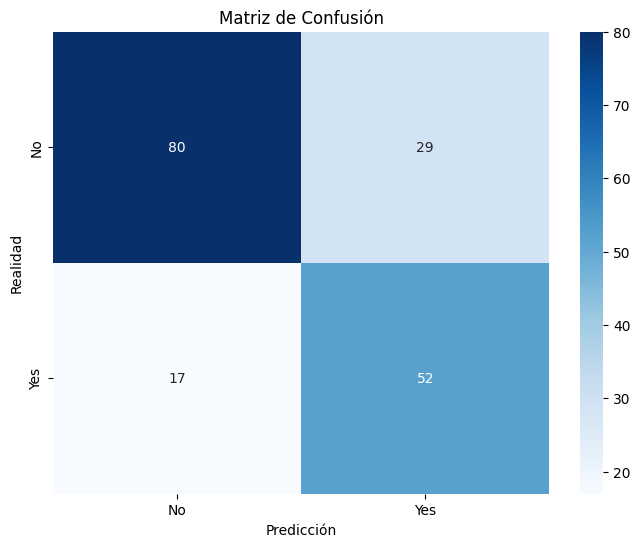

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

### **Optimización de hiperparámetros**

**Definir parámetros para explorar**

In [14]:
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

**Buscar los mejores parámetros**

In [15]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}


### **Visualización del árbol de decisiones**

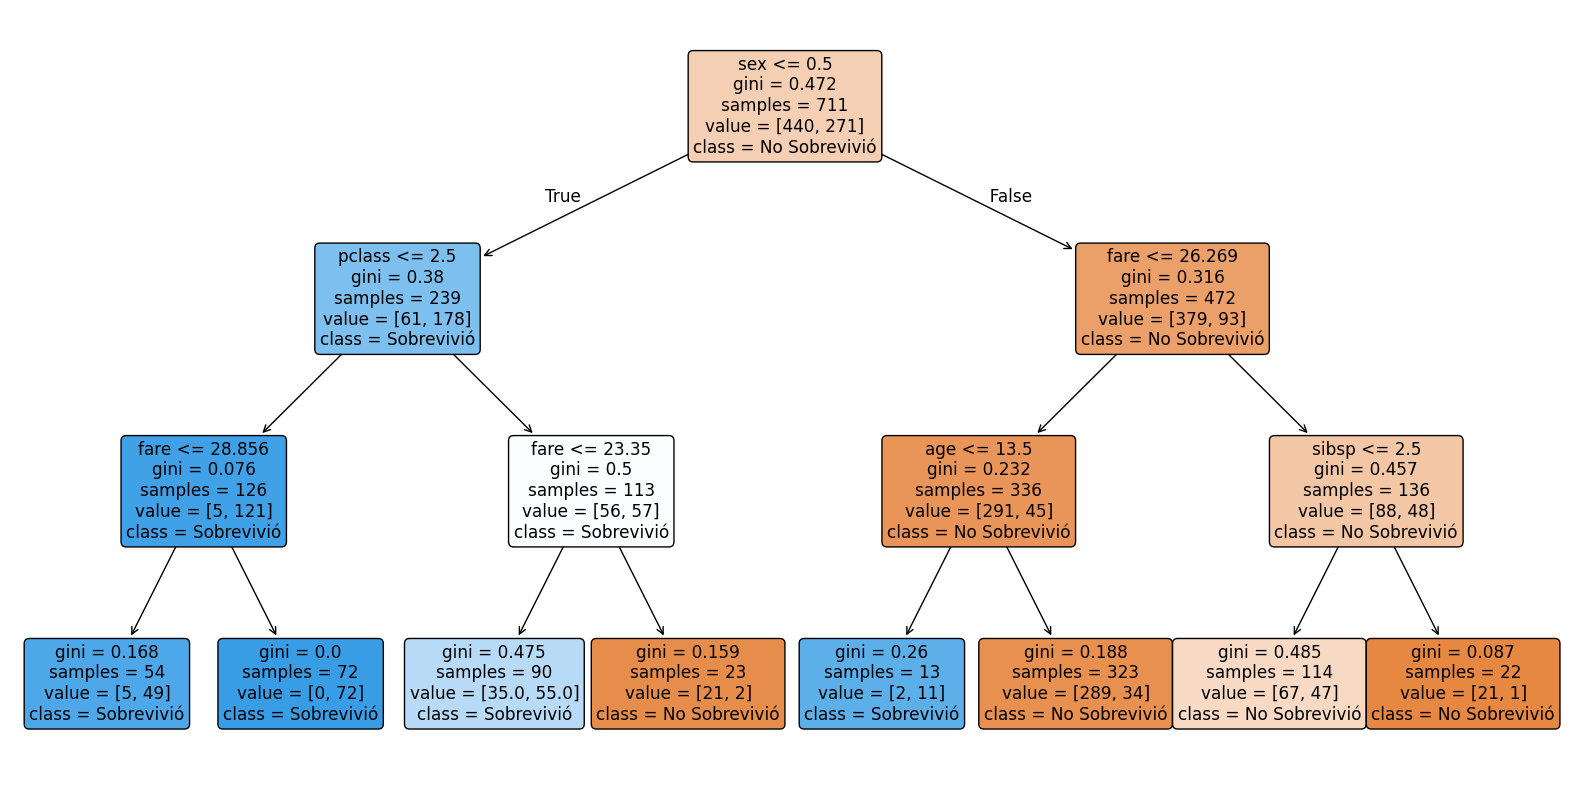

In [16]:
best_tree = grid_search.best_estimator_

plt.figure(figsize=(20,10))
plot_tree(best_tree, 
          feature_names=X.columns, 
          class_names=['No Sobrevivió', 'Sobrevivió'],
          filled=True,
          rounded=True)
plt.show()

### **Importancia de las características**

In [17]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_tree.feature_importances_
}).sort_values(by='importance', ascending=False)

print(feature_importances)

    feature  importance
1       sex    0.600527
0    pclass    0.156206
5      fare    0.125417
2       age    0.086544
3     sibsp    0.031306
4     parch    0.000000
6  embarked    0.000000
7     alone    0.000000


### **Guardar modelo en la carpeta models**

In [18]:
import joblib

filename = 'models/titanic_decision_tree_model.pkl'
joblib.dump(best_tree, filename)

print(f"Modelo guardado en {filename}")

Modelo guardado en models/titanic_decision_tree_model.pkl
